In [58]:
##Research Question
##Does higher income lead to less tobacco and alcohol consumption?

import pandas as pd
import numpy as np

file_path = "/home/jeumma/econometrics_analysis/Family Income and Expenditure.csv"
df = pd.read_csv(file_path)

data = np.nan_to_num(df, nan=0, posinf=0, neginf=0)

#df.info()

df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [36]:
df_selected = df[['Total Household Income', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure']].copy()

# Create a new column for total alcohol + tobacco expenditure
df_selected['Total Tobacco & Alcohol Expenditure'] = (
    df_selected['Alcoholic Beverages Expenditure'] + df_selected['Tobacco Expenditure']
)

# Sort data by income for better visualization
df_selected = df_selected.sort_values(by='Total Household Income')

print(df_selected.columns)
df_selected.columns = df_selected.columns.str.strip()


Index(['Total Household Income', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Total Tobacco & Alcohol Expenditure'],
      dtype='object')


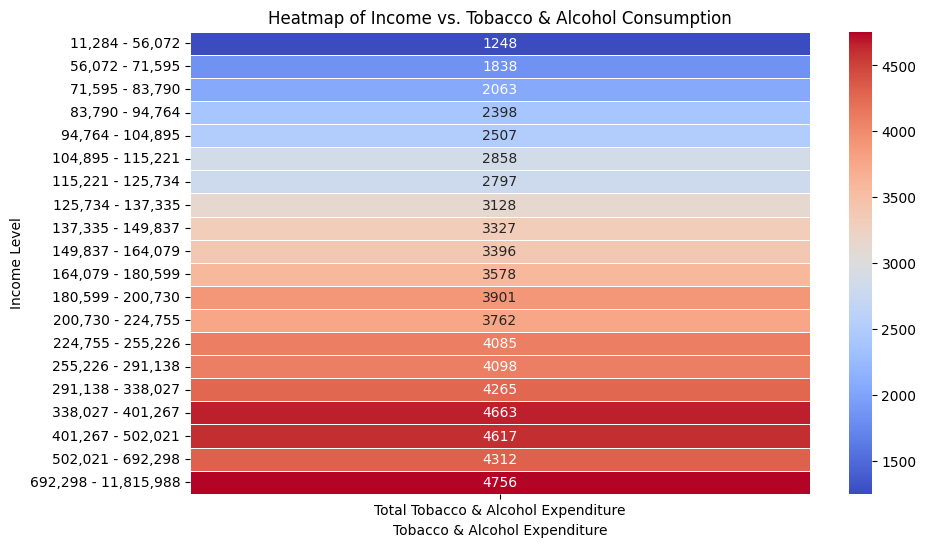

In [46]:
# Create income bins to avoid too many unique values
df_selected['Income Group'] = pd.qcut(df_selected['Total Household Income'], q=20, )  # Dividing into 20 groups

# Create a pivot table
df_pivot = df_selected.pivot_table(index='Income Group', values='Total Tobacco & Alcohol Expenditure', aggfunc='mean')

# Round the values to integers (for Total Tobacco & Alcohol Expenditure)
df_pivot = df_pivot.round().astype(int)

# Format Income Group labels as integers (rounded boundaries of the income bins)
df_pivot.index = pd.Series(df_pivot.index).apply(lambda x: f'{int(x.left):,} - {int(x.right):,}')

import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)  # Use "d" for integer formatting
plt.title("Heatmap of Income vs. Tobacco & Alcohol Consumption")
plt.ylabel("Income Level")
plt.xlabel("Tobacco & Alcohol Expenditure")
plt.show()


In [47]:
# Calculate the correlation between Total Household Income and Total Tobacco & Alcohol Expenditure
correlation = df_selected[['Total Household Income', 'Total Tobacco & Alcohol Expenditure']].corr()

print(correlation)

#Higher income does not necessarily mean significantly higher spending on tobacco and alcohol.
#There might be other factors influencing tobacco and alcohol expenditure, such as:
# --Cultural habits (some high-income individuals may drink less or smoke less for health reasons).
# --Substitution effect (higher-income people may prefer premium alcohol but consume less overall).
# --Regulations and taxes (higher-income people may not be affected as much by tax increases on these goods).
# --Lifestyle differences (wealthier individuals may spend more on other forms of entertainment instead).

                                     Total Household Income  \
Total Household Income                             1.000000   
Total Tobacco & Alcohol Expenditure                0.121348   

                                     Total Tobacco & Alcohol Expenditure  
Total Household Income                                          0.121348  
Total Tobacco & Alcohol Expenditure                             1.000000  


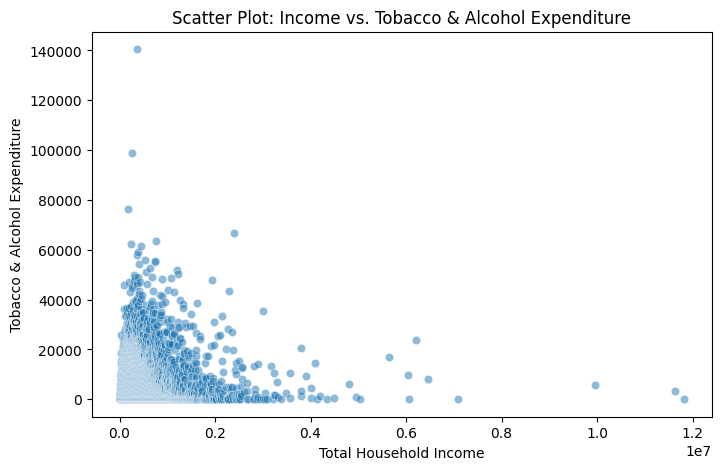

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_selected, x='Total Household Income', y='Total Tobacco & Alcohol Expenditure', alpha=0.5)
plt.title("Scatter Plot: Income vs. Tobacco & Alcohol Expenditure")
plt.xlabel("Total Household Income")
plt.ylabel("Tobacco & Alcohol Expenditure")
plt.show()
